In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("C:\\Users\\A7\\Desktop\\students-performance\\StudentsPerformance.csv")
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
892,female,group A,master's degree,free/reduced,none,50,67,73
190,female,group E,associate's degree,standard,none,66,65,69
825,male,group C,high school,standard,none,62,67,58
237,female,group D,some high school,standard,completed,64,60,74
430,male,group C,associate's degree,free/reduced,none,64,66,59


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
passmark = 50
df.rename(columns = {"math score":"math_score",
                     "reading score":"reading_score",
                     "writing score":"writing_score",
                     "race/ethnicity":"group"},inplace = True)

In [9]:
df["percentage"] = round((df["math_score"]+df["reading_score"]+df["writing_score"]) / 3,2 )
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df.head(3)

,gender,group,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,218
1,female,group C,some college,standard,completed,69,90,88,82.33,247
2,female,group B,master's degree,standard,none,90,95,93,92.67,278


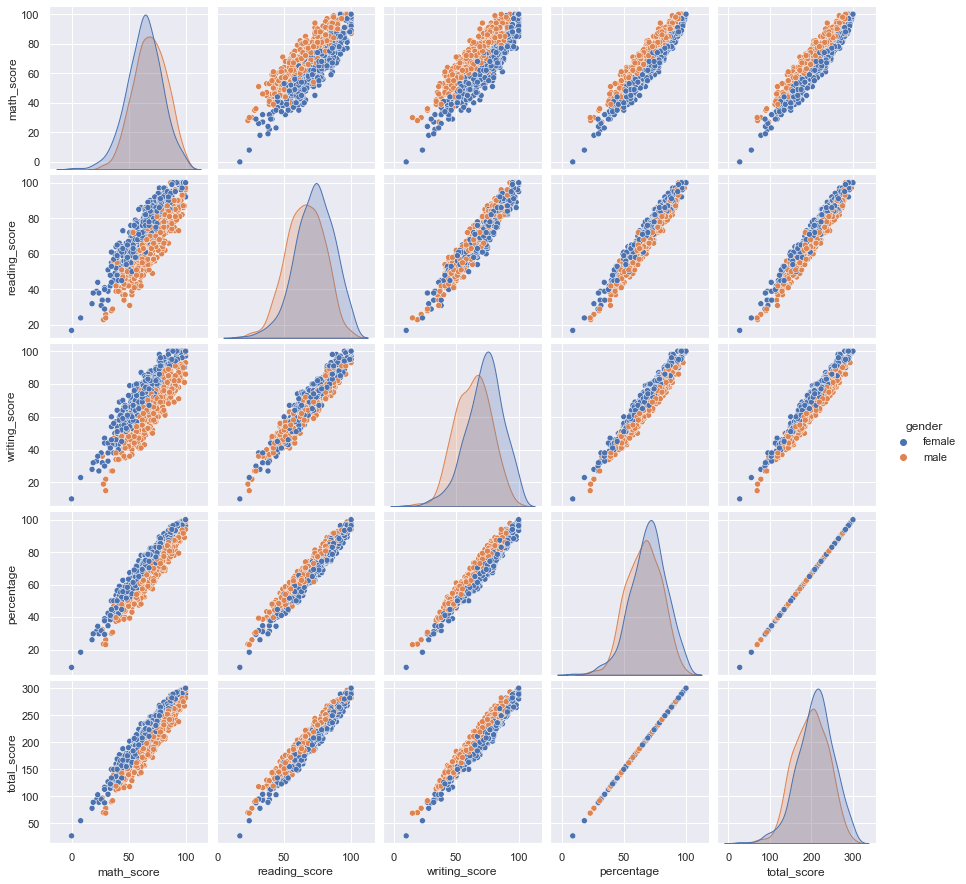

In [11]:
sns.pairplot(data=df , hue="gender")

C:\Users\A7\anaconda3\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x360 with 0 Axes>

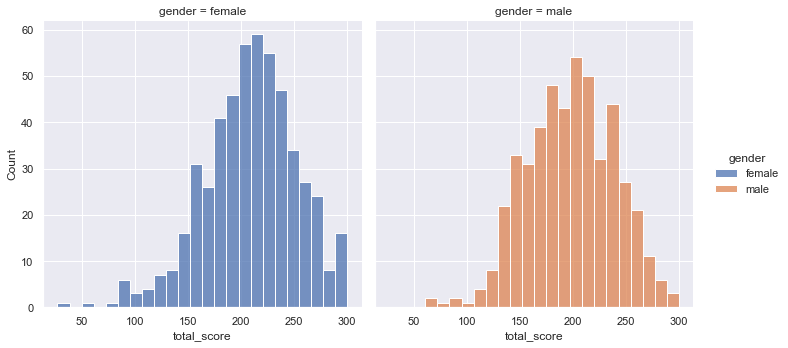

In [21]:
plt.figure(figsize=(8,5))
sns.displot(data=df , x=df["total_score"],hue=df["gender"],col=df["gender"],ax=ax)

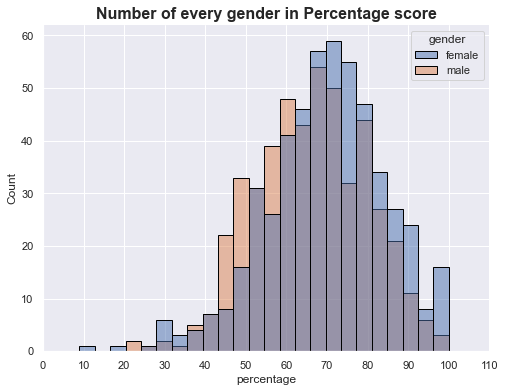

In [57]:
fig , ax = plt.subplots(figsize=(8,6))
sns.despine(fig)
sns.histplot(data=df,x=df["percentage"],hue=df["gender"],edgecolor=(0,0,0))
plt.title("Number of every gender in Percentage score" , fontsize=16,fontweight="semibold")
plt.xticks(np.arange(0, 111, step=10),rotation=0);

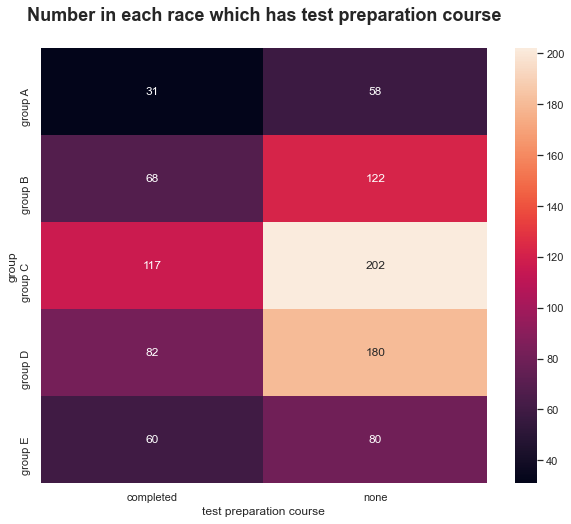

In [104]:
plt.figure(figsize=(10,8))
grouped_values = df.groupby(["group","test preparation course"]).size().reset_index(name="values")
count = grouped_values.pivot(index="group" , columns="test preparation course" , values="values")
sns.heatmap(count,annot=True,fmt="d")
plt.title("Number in each race which has test preparation course",fontsize=18,fontweight="bold",y=1.05);

<AxesSubplot:xlabel='test preparation course', ylabel='total_score'>

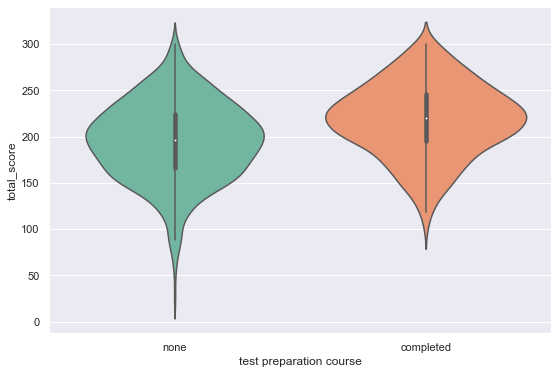

In [110]:
plt.figure(figsize=(9,6))
sns.violinplot(x=df["test preparation course"], y=df["total_score"], data=df,split=True)

In [105]:
df.sample()

,gender,group,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score,percentage,total_score
525,male,group E,some college,standard,none,68,60,59,62.33,187


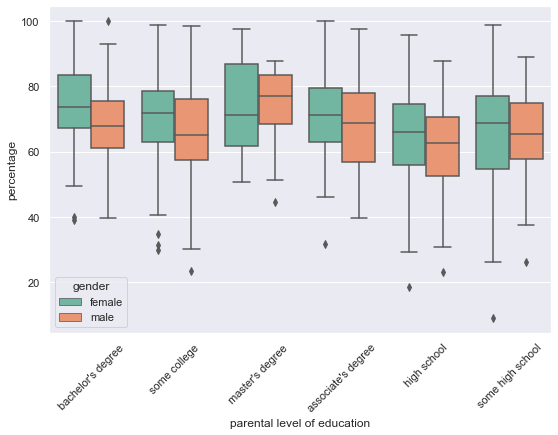

In [126]:
plt.figure(figsize=(9,6))
sns.boxplot(x=df["parental level of education"],y=df["percentage"],hue=df["gender"])
plt.xticks(rotation=45);

<AxesSubplot:xlabel='percentage', ylabel='group'>

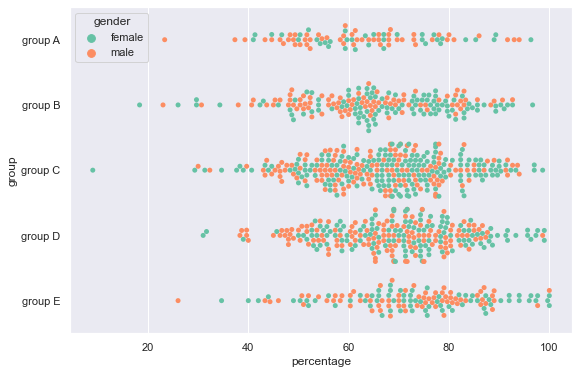

In [127]:
plt.figure(figsize=(9,6))
sns.swarmplot(data=df,x=df["percentage"] , y=df["group"],
              hue=df["gender"],order=sorted(df["group"].unique()))
